In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('DataSets/Algerian_forest_fires_cleaned_data.csv')

In [7]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [8]:
df.shape

(243, 15)

In [9]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [11]:
df.drop(['day','month', 'year'],axis = 1, inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    object 
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 22.9+ KB


In [13]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [14]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [15]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [16]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


Seperating dependent and independeant features

In [17]:
X = df.drop('FWI', axis = 1)
y = df['FWI']

In [18]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [19]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [22]:
X_train.shape

(182, 11)

In [23]:
X_test.shape

(61, 11)

Feature Selection Based on Corr

In [24]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

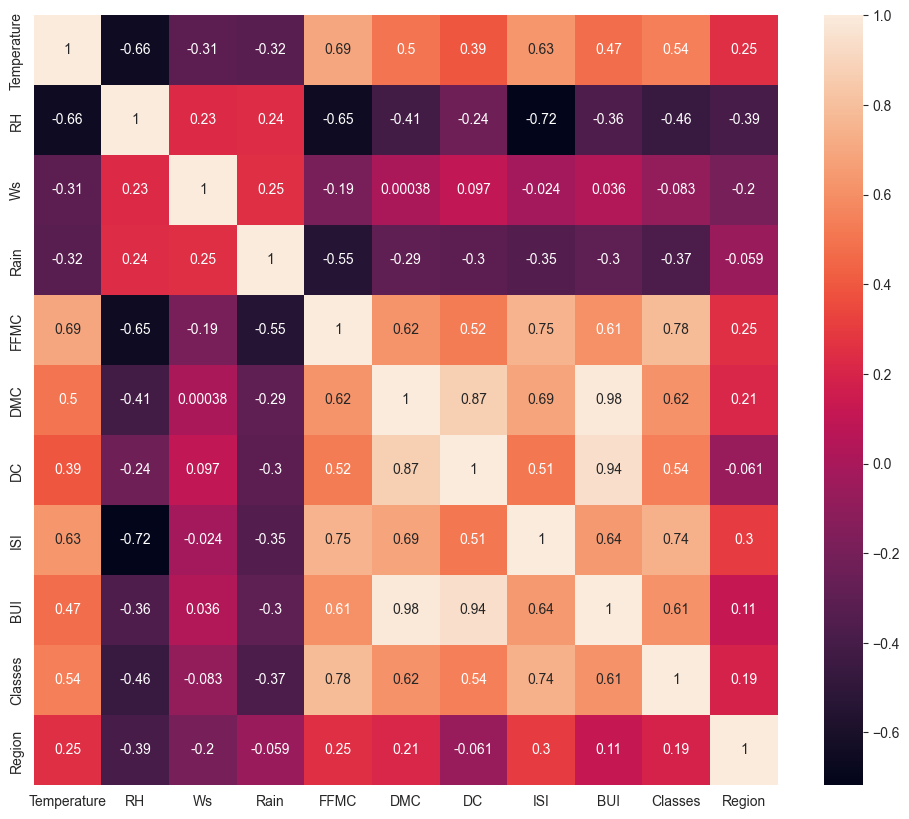

In [25]:
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(),annot=True)

In [26]:
def correlation(dataset, threshold):
    col_correlation = set()
    corr_matrix = dataset.corr()
    for i in range (len(corr_matrix)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_name = corr_matrix.columns[i]
                col_correlation.add(col_name)
    return col_correlation


In [27]:
corr_features = correlation(X_train,0.85)

In [28]:
corr_features

{'BUI', 'DC'}

In [29]:
X_train.drop(corr_features, axis =1, inplace = True)

In [30]:
X_test.drop(corr_features, axis =1, inplace = True)

In [31]:
X_train.shape, X_test.shape

((182, 9), (61, 9))

Performing Standardization

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

/var/folders/lx/cnv3rfws413bvdrf_lmgv88w0000gn/T/ipykernel_87298/1060665675.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


Text(0.5, 1.0, 'After Standardization')

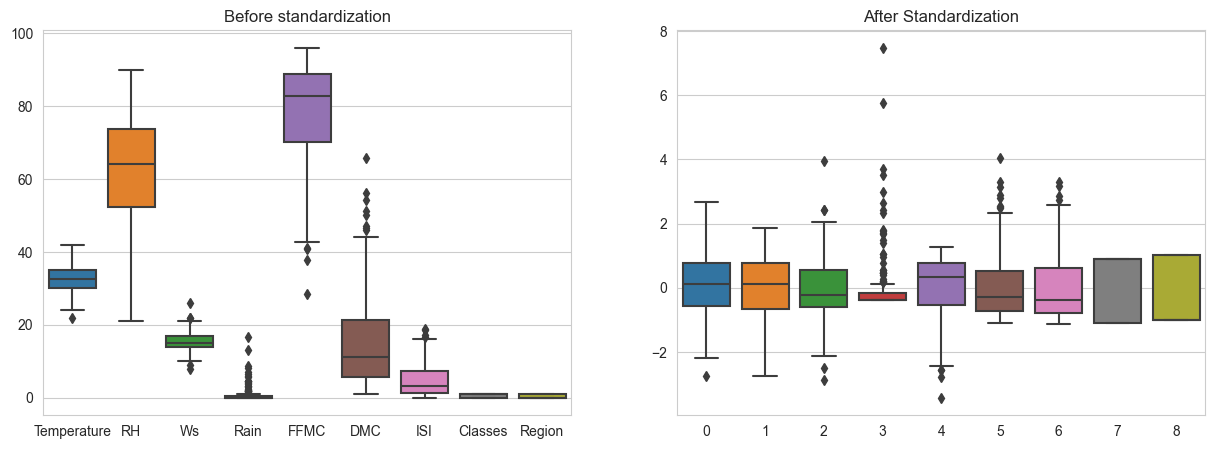

In [36]:
plt.subplots(figsize = (15,5))
plt.subplot(121)
sns.boxplot(X_train)
plt.title('Before standardization')
plt.subplot(122)
sns.boxplot(X_train_scaled)
plt.title('After Standardization')

In [37]:
y_test.shape

(61,)

Linear Regression model

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

regressor = LinearRegression()
regressor.fit(X_train_scaled,y_train)
y_train_pred =regressor.predict(X_train_scaled)

mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train,y_train_pred)

print('mae = ' , mae)
print('mse = ', mse)

r2 = r2_score(y_train, y_train_pred)
print('r2 score = ', r2)


mae =  0.7438000223762671
mse =  1.7670371861973675
r2 score =  0.969907766275777


In [39]:
y_test_pred =regressor.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test,y_test_pred)

print('mae = ' , mae)
print('mse = ', mse)

r2 = r2_score(y_test, y_test_pred)
print('r2 score = ', r2)

mae =  0.5468236465249982
mse =  0.6742766873791581
r2 score =  0.9847657384266951


/var/folders/lx/cnv3rfws413bvdrf_lmgv88w0000gn/T/ipykernel_87298/1137615012.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


Text(0.5, 1.0, 'Test data plot')

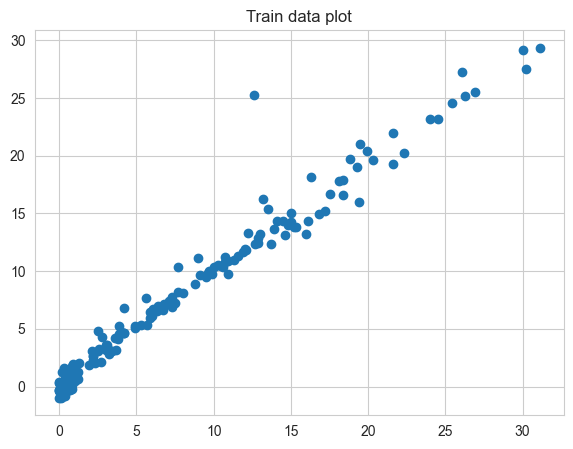

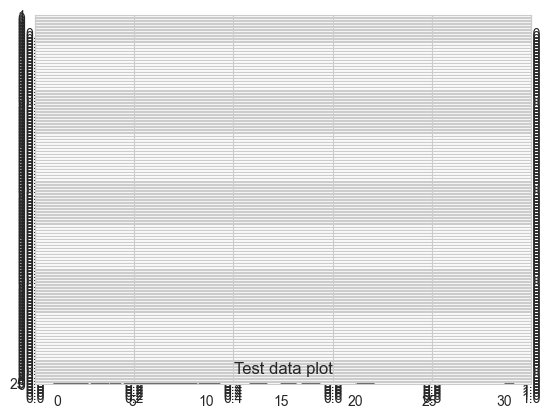

In [40]:
plt.subplots(figsize = (15,5))
plt.subplot(121)
plt.scatter(y_train, y_train_pred)
plt.title('Train data plot')
plt.subplots(122)
plt.scatter(y_test, y_test_pred)
plt.title('Test data plot')


Text(0.5, 1.0, 'Test data plot')

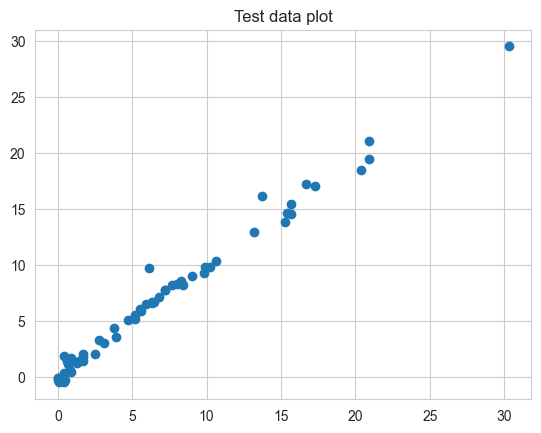

In [41]:
plt.scatter(y_test, y_test_pred)
plt.title('Test data plot')

In [42]:
residuals = y_test - y_test_pred
residuals

24     0.176595
6     -0.552529
152    0.754117
232   -0.555893
238   -0.191359
         ...   
162    0.157949
178   -0.017026
224    0.272668
230    0.782918
154    0.019510
Name: FWI, Length: 61, dtype: float64

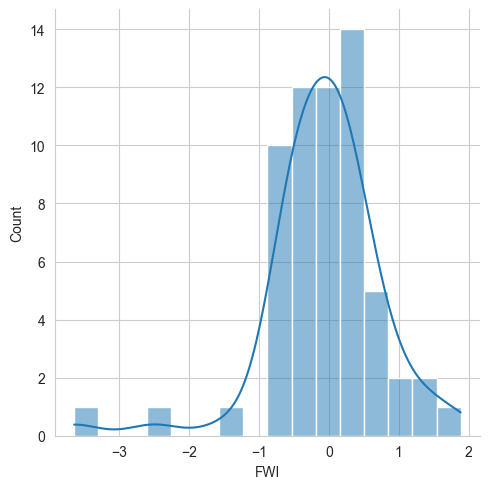

In [43]:
sns.displot(residuals, kde = True)

Lasso Regression L1 Regularization used for feature selection


Ridge Regression L2 Regularization used for preventing overfitting

In [44]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
ridge = Ridge()

In [45]:
ridge.fit(X_train_scaled, y_train)

Ridge()

Training Data Output

In [46]:
y_train_pred_ridge = ridge.predict(X_train_scaled)

In [47]:
r2 = r2_score(y_train, y_train_pred_ridge)
mse = mean_squared_error(y_train, y_train_pred_ridge)
mae = mean_absolute_error(y_train, y_train_pred_ridge)

In [48]:
print('R2 Score is ', r2)
print('MSE Score is ', mse)
print('MAE Score is ', mae)

R2 Score is  0.9698587766663882
MSE Score is  1.769913890609564
MAE Score is  0.759049658219337


Testing Data Output

In [49]:
y_test_pred_ridge = ridge.predict(X_test_scaled)

In [50]:
r2 = r2_score(y_test, y_test_pred_ridge)
mse = mean_squared_error(y_test, y_test_pred_ridge)
mae = mean_absolute_error(y_test, y_test_pred_ridge)

In [51]:
print('R2 Score is ', r2)
print('MSE Score is ', mse)
print('MAE Score is ', mae)

R2 Score is  0.9842993364555513
MSE Score is  0.6949198918152057
MAE Score is  0.5642305340105697


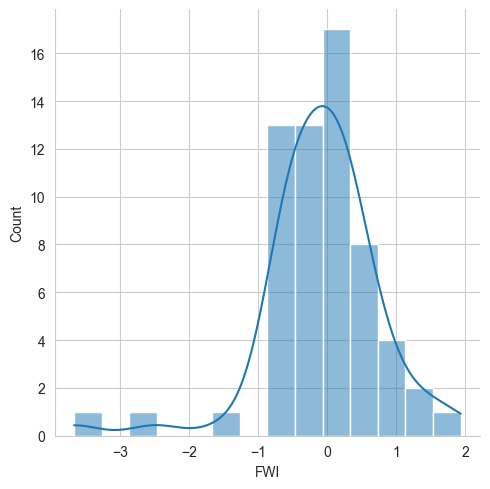

In [52]:
residuals = y_test - y_test_pred_ridge
sns.displot(residuals, kde = True)

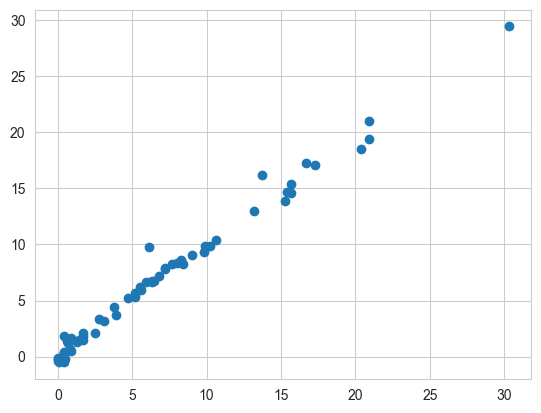

In [53]:
plt.scatter(y_test, y_test_pred_ridge)

ElasticNet Regression Combination of both ridge and lasso

In [54]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
elastic_regressor = ElasticNet()

For training Data

In [55]:
elastic_regressor.fit(X_train_scaled,y_train)
y_elastic_pred = elastic_regressor.predict(X_train_scaled)

r2 = r2_score(y_train,y_elastic_pred)
mae = mean_absolute_error(y_train,y_elastic_pred)
mse = mean_squared_error(y_train,y_elastic_pred)

In [56]:
print('R2 core is', r2)
print('mae core is', mae)
print('mse core is', mse)

R2 core is 0.8886062760838327
mae core is 1.8976516097753915
mse core is 6.541118026423719
